In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [76]:
df = pd.read_csv('/content/heart_disease_data1.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Null values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate rows: 1


In [78]:
df.drop_duplicates(inplace=True)

In [79]:
# Separate features and target first
X = df.drop('target', axis=1)
y = df['target']

# Scale features only (not the target)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Now split the scaled features and raw target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)


rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest - Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest - Test Accuracy:", rf.score(X_test, y_test))


Random Forest - Train Accuracy: 0.8838174273858921
Random Forest - Test Accuracy: 0.8524590163934426


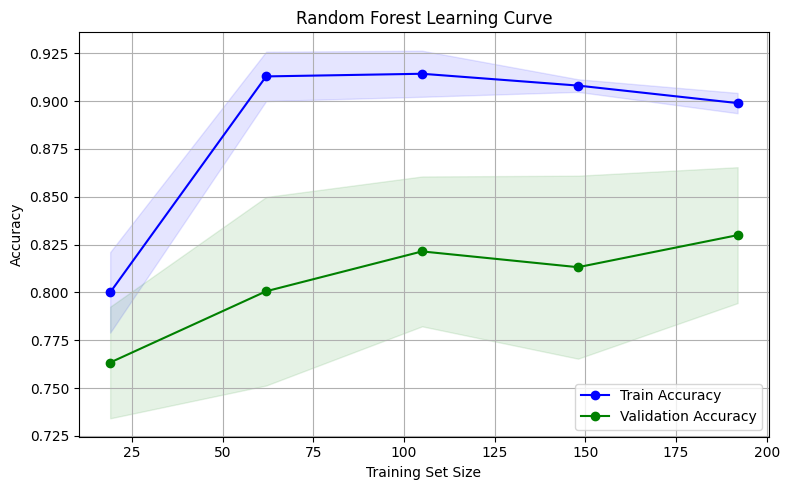

In [81]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Train Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")

# Fill the gaps to show variation (shaded area)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



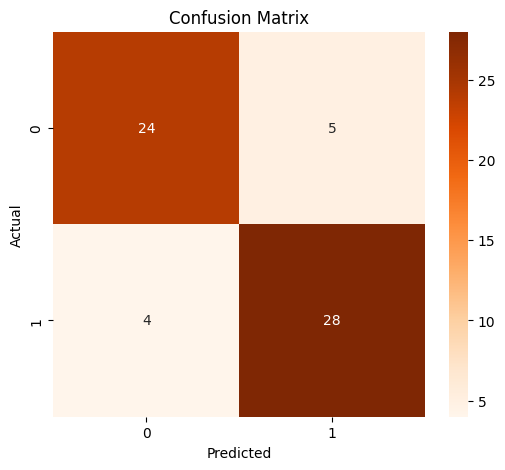

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


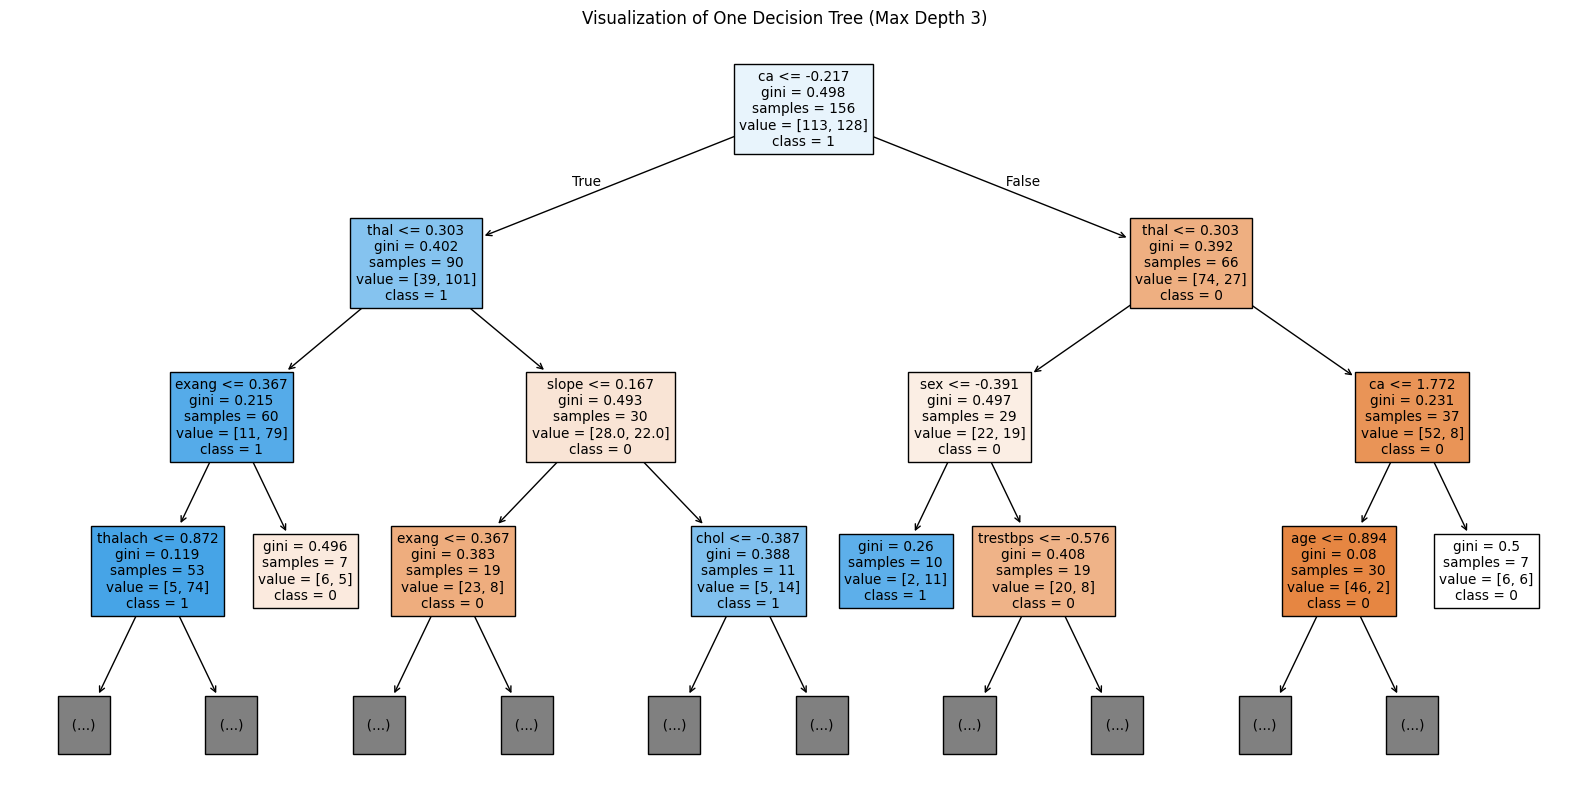

In [84]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, class_names=["0", "1"], filled=True, max_depth=3)
plt.title("Visualization of One Decision Tree (Max Depth 3)")
plt.show()
